### Importing Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bertopic import BERTopic
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download

### Loading Data and Pre-processing

In [37]:

try:
    stopwords.words('english')
    WordNetLemmatizer()
except LookupError:
    download('stopwords')
    download('wordnet')
    download('omw-1.4')

# Loading the CSV file.
df = pd.read_csv('AI in Renwable energies.csv')

# Dropping rows with missing values
df.dropna(subset=['Abstract', 'Title', 'Year'], inplace=True)
df['Year'] = df['Year'].astype(int)

# Combining Title and Abstract
df['document'] = df['Title'] + ". " + df['Abstract']

df.head()

,Title,Year,Link,Affiliations,Abstract,document
0,Smart Cropping based on Predicted Solar Radiat...,2020,https://www.scopus.com/inward/record.uri?eid=2...,St. Thomas' College of Engineering and Technol...,Our world is developing very fast. This fast p...,Smart Cropping based on Predicted Solar Radiat...
1,Systematic literature review of photovoltaic o...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Energy Systems Engineering, Mani...",Since the harmful effects of climate warming o...,Systematic literature review of photovoltaic o...
2,Demystifying the use of era5-land and machine ...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"DRAMCO, Department of Electrical Engineering (...",Wind is a highly unstable renewable energy sou...,Demystifying the use of era5-land and machine ...
3,A CNN-Based Warning Information Preprocessing ...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"North China Electric Power University, School ...",The access of large-scale renewable energy and...,A CNN-Based Warning Information Preprocessing ...
4,Short-Term Photovoltaic Power Prediction Model...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"Northeastern University, College of Informatio...","In recent years, with the rapid expansion of t...",Short-Term Photovoltaic Power Prediction Model...


**Lemmatization**

In [38]:
# Initialize lemmatizer and stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['using', 'based', 'approach', 'model', 'data', 'study', 'research', 'like', 'result', 'paper', 'work', 'new'])

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in custom_stopwords and len(word) > 2]
    return ' '.join(tokens)

df['Processed_Text'] = df['document'].apply(preprocess_text)
df.head(5)

,Title,Year,Link,Affiliations,Abstract,document,Processed_Text
0,Smart Cropping based on Predicted Solar Radiat...,2020,https://www.scopus.com/inward/record.uri?eid=2...,St. Thomas' College of Engineering and Technol...,Our world is developing very fast. This fast p...,Smart Cropping based on Predicted Solar Radiat...,smart cropping predicted solar radiation iot m...
1,Systematic literature review of photovoltaic o...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Energy Systems Engineering, Mani...",Since the harmful effects of climate warming o...,Systematic literature review of photovoltaic o...,systematic literature review photovoltaic outp...
2,Demystifying the use of era5-land and machine ...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"DRAMCO, Department of Electrical Engineering (...",Wind is a highly unstable renewable energy sou...,Demystifying the use of era5-land and machine ...,demystifying use eraland machine learning wind...
3,A CNN-Based Warning Information Preprocessing ...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"North China Electric Power University, School ...",The access of large-scale renewable energy and...,A CNN-Based Warning Information Preprocessing ...,cnnbased warning information preprocessing met...
4,Short-Term Photovoltaic Power Prediction Model...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"Northeastern University, College of Informatio...","In recent years, with the rapid expansion of t...",Short-Term Photovoltaic Power Prediction Model...,shortterm photovoltaic power prediction modeli...


### Topic Modeling with BERTopic

In [39]:
!pip install hf_xet

In [40]:
# Initializing BERTopic model & Fitting the model to the documents.
# topic_model = BERTopic(nr_topics='auto', verbose=True)

# We are using a fixed number of topics here to make the merging step predictable.

topic_model = BERTopic(nr_topics=20, verbose=True) # Adjusting nr_topics as needed
topics, probabilities = topic_model.fit_transform(df['Processed_Text'])

# Get the list of topics and their top words
topic_info = topic_model.get_topic_info()
print("Top 10 Topics Found:")
print(topic_info.head(11)) # We'll print 11 because -1 is the outlier topic


2025-08-04 17:38:37,251 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/178 [00:00<?, ?it/s]

2025-08-04 17:43:23,973 - BERTopic - Embedding - Completed ✓
2025-08-04 17:43:23,973 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-04 17:43:27,094 - BERTopic - Dimensionality - Completed ✓
2025-08-04 17:43:27,094 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-04 17:43:27,388 - BERTopic - Cluster - Completed ✓
2025-08-04 17:43:27,390 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-08-04 17:43:28,409 - BERTopic - Representation - Completed ✓
2025-08-04 17:43:28,409 - BERTopic - Topic reduction - Reducing number of topics
2025-08-04 17:43:28,458 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-04 17:43:29,197 - BERTopic - Representation - Completed ✓
2025-08-04 17:43:29,209 - BERTopic - Topic reduction - Reduced number of topics from 86 to 20


Top 10 Topics Found:
    Topic  Count                                    Name  \
0      -1   2288        -1_energy_system_power_renewable   
1       0    888          0_wind_forecasting_speed_power   
2       1    679              1_energy_system_power_grid   
3       2    414     2_production_waste_biogas_anaerobic   
4       3    329         3_control_controller_power_mppt   
5       4    251           4_energy_water_neural_network   
6       5    214  5_energy_development_renewable_country   
7       6    210        6_fault_turbine_detection_system   
8       7     80             7_image_solar_rooftop_panel   
9       8     66   8_catalyst_hydrogen_reaction_activity   
10      9     64             9_biodiesel_oil_engine_fuel   

                                       Representation  \
0   [energy, system, power, renewable, solar, netw...   
1   [wind, forecasting, speed, power, prediction, ...   
2   [energy, system, power, grid, battery, renewab...   
3   [production, waste, biogas

### Data Visualization

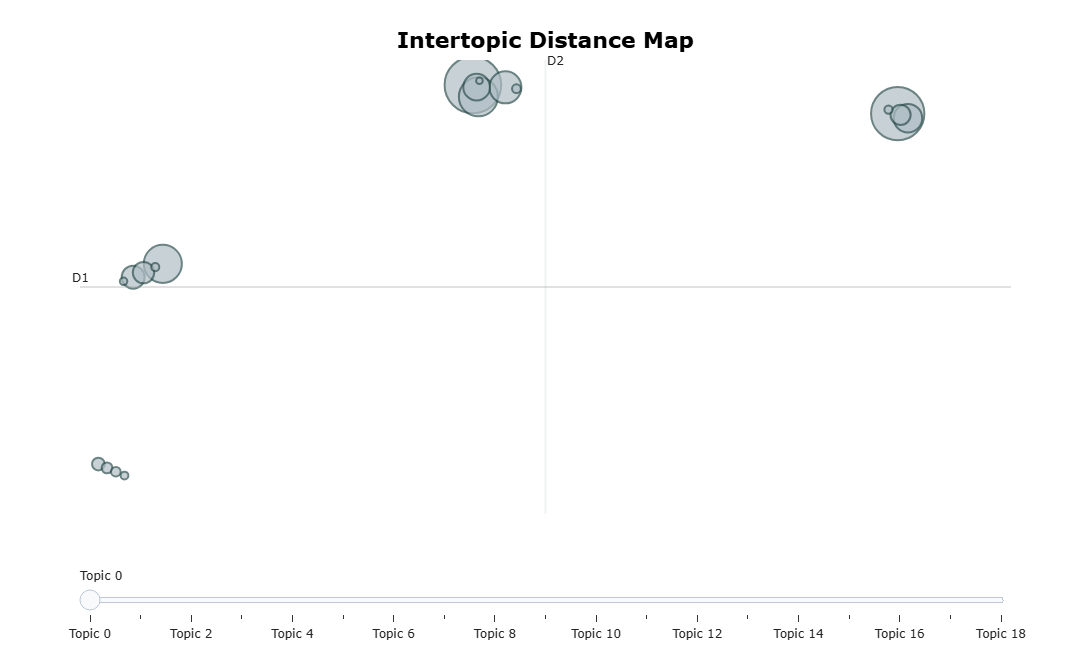

In [25]:
# Visualizing the relationships between topics
topic_model.visualize_topics()


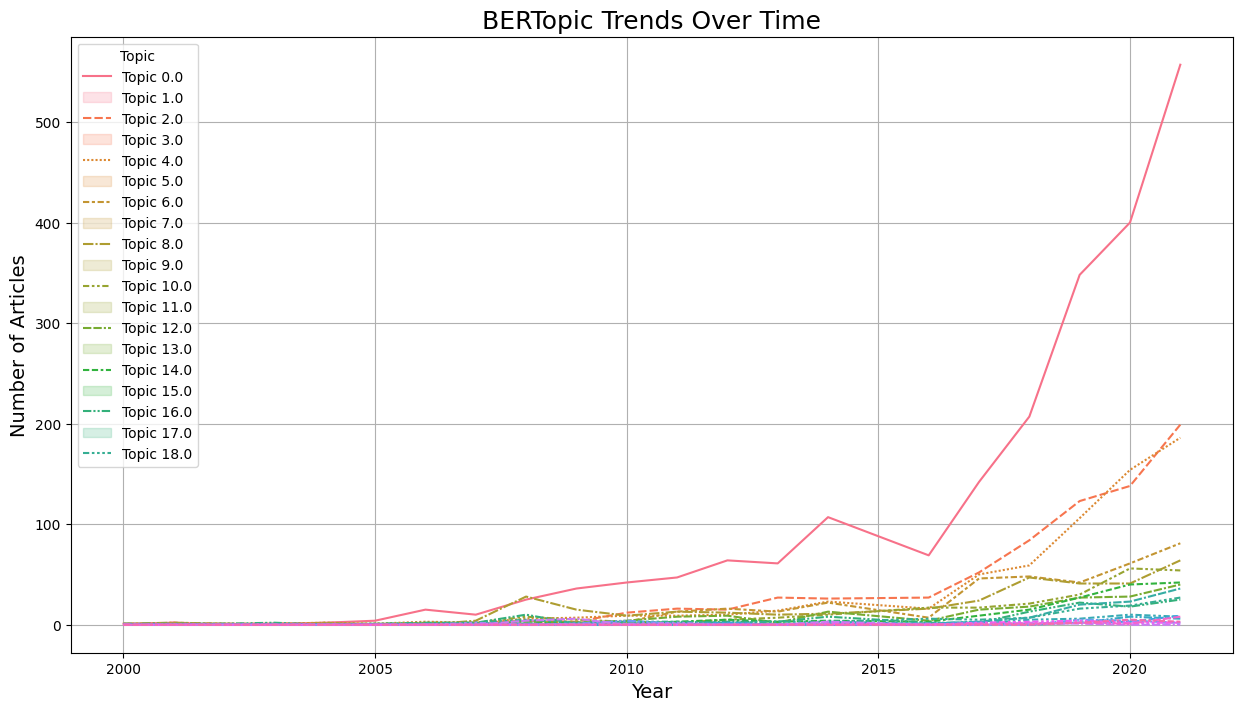

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

doc_info = topic_model.get_document_info(df['document'])

# We need to extract the topic number for each document
df['dominant_topic_bertopic'] = doc_info['Topic']

# Group by year and dominant topic to see trends
topic_trend = df.groupby(['Year', 'dominant_topic_bertopic']).size().unstack(fill_value=0)

# Plotting the topic trends over time
plt.figure(figsize=(15, 8))
sns.lineplot(data=topic_trend)
plt.title('BERTopic Trends Over Time', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
topic_labels = {idx: f'Topic {idx}' for idx in topic_trend.columns if idx != -1}
plt.legend(title='Topic', labels=topic_labels.values())
plt.grid(True)
plt.show();

### Results
**Merging Topics to Create Metatopics and Labeling Metatopics**

In [27]:
# 1. Analyzing top words per topic to identify candidates for merging
for topic_num in topic_model.get_topic_info().head(10)['Topic']:
    print(f"\nTopic {topic_num}:")
    print(topic_model.get_topic(topic_num))



Topic -1:
[('energy', np.float64(0.03015795518964009)), ('power', np.float64(0.02568033916634588)), ('system', np.float64(0.023336054697929598)), ('renewable', np.float64(0.01912588014579406)), ('network', np.float64(0.017380185863160712)), ('solar', np.float64(0.017092425679774422)), ('wind', np.float64(0.016574006582645906)), ('neural', np.float64(0.014774816534819421)), ('forecasting', np.float64(0.014726240704431954)), ('method', np.float64(0.014303344782986544))]

Topic 0:
[('energy', np.float64(0.038965770344585926)), ('system', np.float64(0.0313156832863276)), ('renewable', np.float64(0.02206537156092446)), ('power', np.float64(0.021422646477377377)), ('battery', np.float64(0.02053235974114268)), ('optimization', np.float64(0.019609334334090435)), ('storage', np.float64(0.018897080946176707)), ('cost', np.float64(0.017789920153432618)), ('grid', np.float64(0.017295897070278576)), ('proposed', np.float64(0.017227931201311376))]

Topic 1:
[('wind', np.float64(0.04830499743859556)

In [28]:
# 2. Manually defining topic groups that are semantically related

solar_group = [1, 4, 5, 8]                       # Topics related to Solar Energy
wind_group = [2, 6, 14]                          # Topics related to Wind Power
deep_learning_group = [3, 9, 12]                 # Topics on Deep Learning and AI Applications


In [55]:
# 3. Manually Merging Topics into Metatopics
topic_mapping = {
    # Outlier topic
    -1: -1,
    # Topics that seem related to Solar Energy
    1: 1, 4: 1, 5: 1, 8: 1,
    # Topics that seem related to Wind Energy
    2: 2, 6: 2, 14: 2,
    # Topics that seem related to AI Algorithms and Optimization
    3: 3, 9: 3, 12: 3,
    # Remaining topics can be kept as they are or merged into a different category
    7: 7, 10: 10, 11: 11, 13: 13, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19
}
for i in range(10, 20):
    topic_mapping[i] = i

merged_topics = [topic_mapping.get(topic, topic) for topic in topics]
df['merged_topic_id'] = merged_topics

df.head()

,Title,Year,Link,Affiliations,Abstract,document,Processed_Text,merged_topic_id
0,Smart Cropping based on Predicted Solar Radiat...,2020,https://www.scopus.com/inward/record.uri?eid=2...,St. Thomas' College of Engineering and Technol...,Our world is developing very fast. This fast p...,Smart Cropping based on Predicted Solar Radiat...,smart cropping predicted solar radiation iot m...,-1
1,Systematic literature review of photovoltaic o...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Energy Systems Engineering, Mani...",Since the harmful effects of climate warming o...,Systematic literature review of photovoltaic o...,systematic literature review photovoltaic outp...,-1
2,Demystifying the use of era5-land and machine ...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"DRAMCO, Department of Electrical Engineering (...",Wind is a highly unstable renewable energy sou...,Demystifying the use of era5-land and machine ...,demystifying use eraland machine learning wind...,0
3,A CNN-Based Warning Information Preprocessing ...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"North China Electric Power University, School ...",The access of large-scale renewable energy and...,A CNN-Based Warning Information Preprocessing ...,cnnbased warning information preprocessing met...,-1
4,Short-Term Photovoltaic Power Prediction Model...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"Northeastern University, College of Informatio...","In recent years, with the rapid expansion of t...",Short-Term Photovoltaic Power Prediction Model...,shortterm photovoltaic power prediction modeli...,-1


In [56]:
# 4. Reviewing updated topics
print("\nUpdated Topic Info after Merging:")
print(topic_model.get_topic_info().head(10))


Updated Topic Info after Merging:
   Topic  Count                                    Name  \
0     -1   2288        -1_energy_system_power_renewable   
1      0    888          0_wind_forecasting_speed_power   
2      1    679              1_energy_system_power_grid   
3      2    414     2_production_waste_biogas_anaerobic   
4      3    329         3_control_controller_power_mppt   
5      4    251           4_energy_water_neural_network   
6      5    214  5_energy_development_renewable_country   
7      6    210        6_fault_turbine_detection_system   
8      7     80             7_image_solar_rooftop_panel   
9      8     66   8_catalyst_hydrogen_reaction_activity   

                                      Representation  \
0  [energy, system, power, renewable, solar, netw...   
1  [wind, forecasting, speed, power, prediction, ...   
2  [energy, system, power, grid, battery, renewab...   
3  [production, waste, biogas, anaerobic, methane...   
4  [control, controller, power, mpp

In [57]:
# 5. Labelling the merged topics (for presentation/discussion)
metatopic_labels = {
    1: "Solar Energy Systems",
    2: "Wind Power Forecasting & Grid Integration",
    3: "Deep Learning in Energy Management",
    # You can add or adjust based on your final topics
}

# Mapping the numeric IDs to the descriptive labels for plotting
df['metatopic_label'] = df['merged_topic_id'].map(metatopic_labels).fillna("Other")

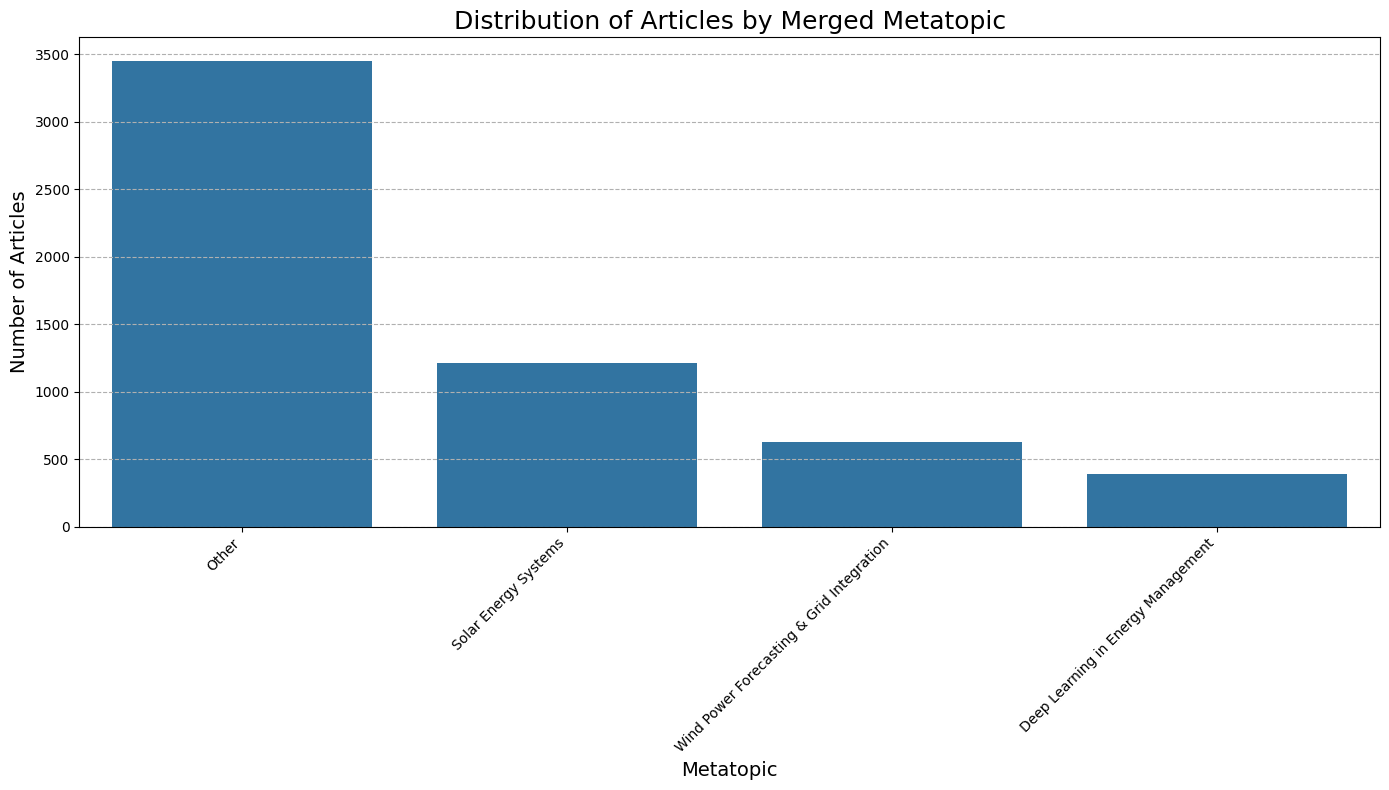

In [58]:
# --- 5. Visualization of Labeled Metatopics ---
# Plotting the topic distribution
metatopic_counts = df['metatopic_label'].value_counts()
plt.figure(figsize=(14, 8))
sns.barplot(x=metatopic_counts.index, y=metatopic_counts.values)
plt.title('Distribution of Articles by Merged Metatopic', fontsize=18)
plt.xlabel('Metatopic', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show();

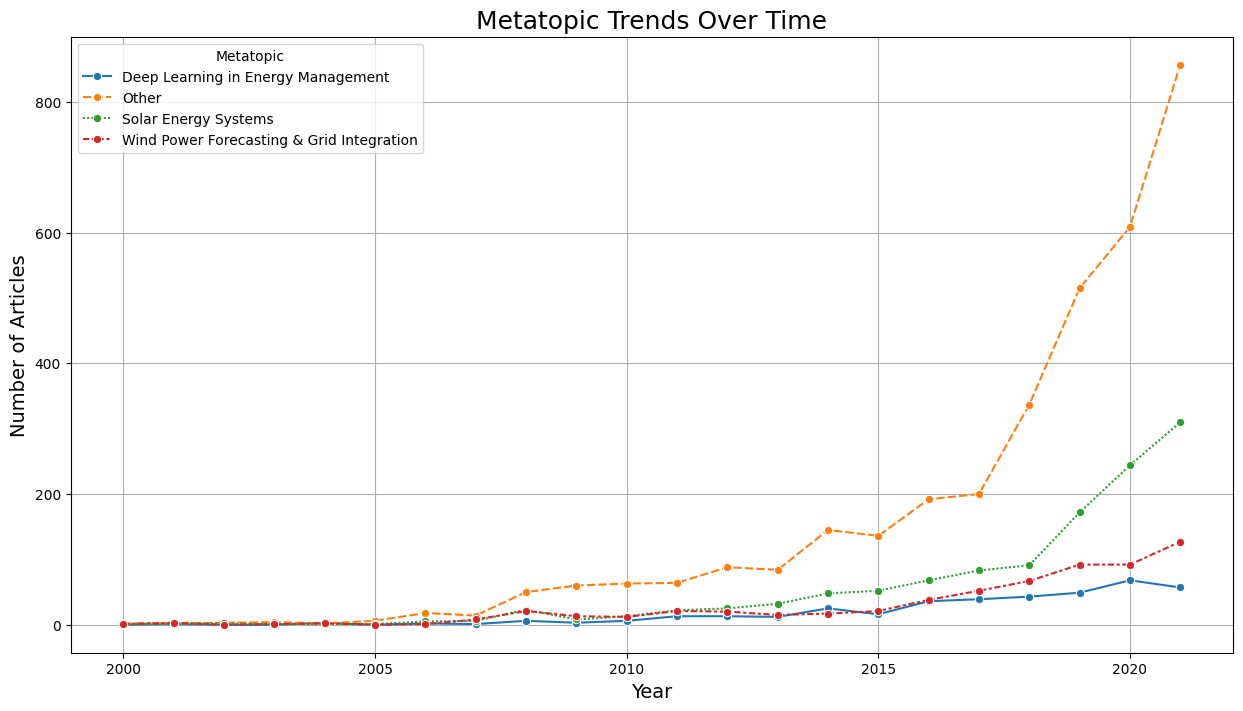

In [59]:
# Plotting the topic trends over time
metatopic_trend = df.groupby(['Year', 'metatopic_label']).size().unstack(fill_value=0)
plt.figure(figsize=(15, 8))
sns.lineplot(data=metatopic_trend, marker='o')
plt.title('Metatopic Trends Over Time', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.legend(title='Metatopic', loc='upper left')
plt.grid(True)
plt.show();

### Discussions

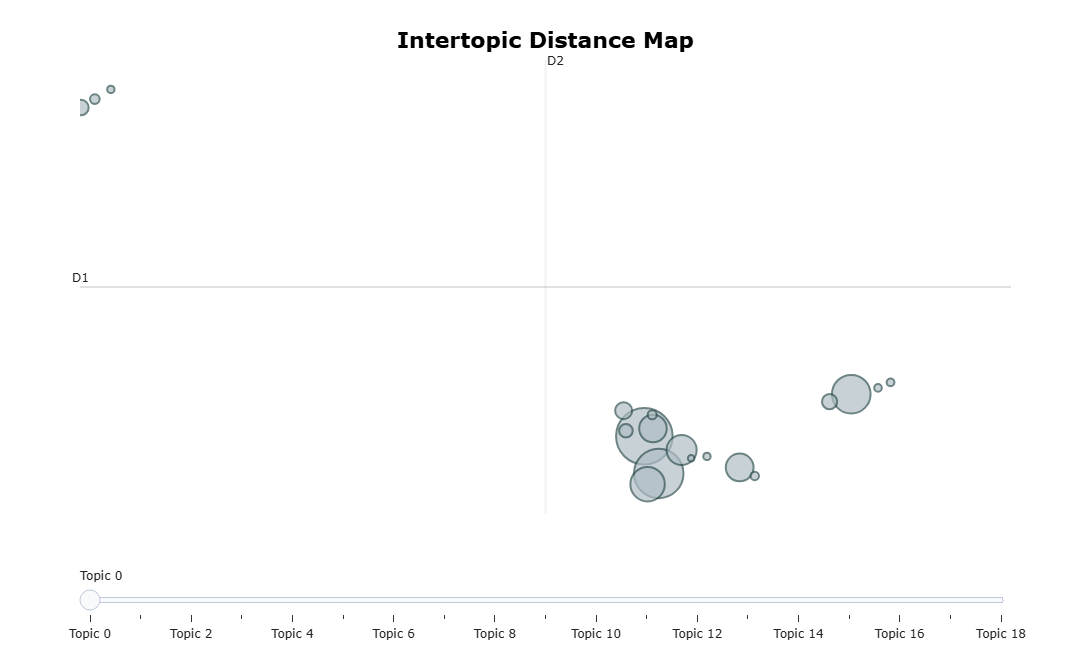

In [61]:
# 1. Visualize updated topic clusters
fig_topics = topic_model.visualize_topics()
fig_topics.show()

# Exporting to HTML
fig_topics.write_html("topics_visualization.html")


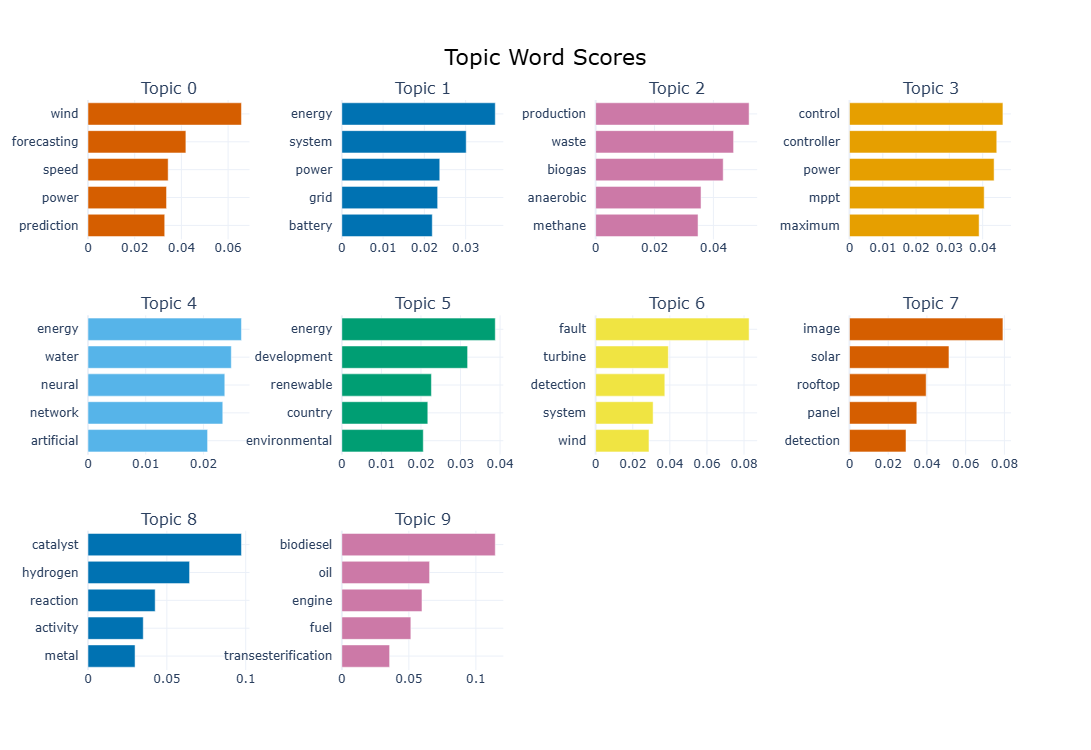

In [62]:
# 2. Visualize topic frequency (Top N topics)
fig_barchart = topic_model.visualize_barchart(top_n_topics=10)
fig_barchart.show()
fig_barchart.write_html("topic_barchart.html")


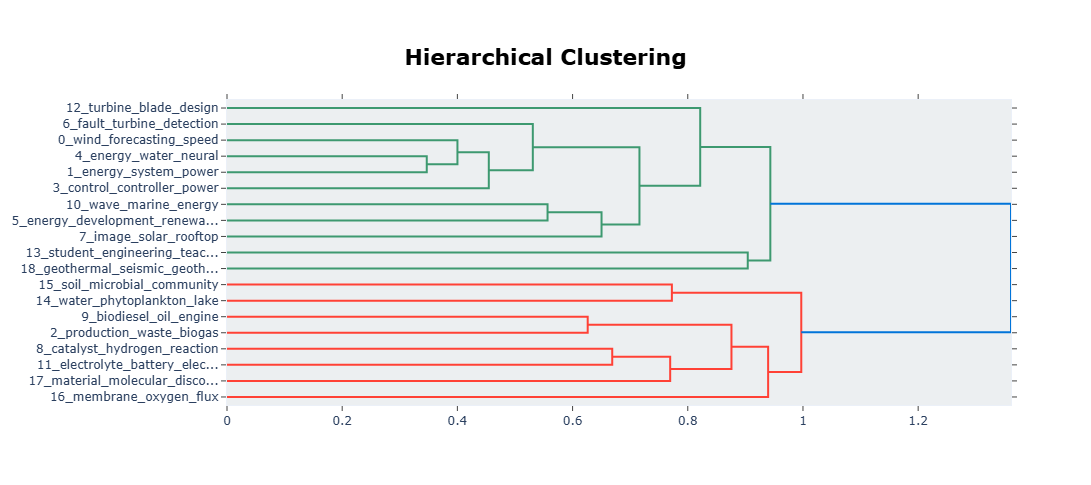

In [63]:
# 3. Visualize topic hierarchy
fig_hierarchy = topic_model.visualize_hierarchy()
fig_hierarchy.show()
fig_hierarchy.write_html("topic_hierarchy.html")


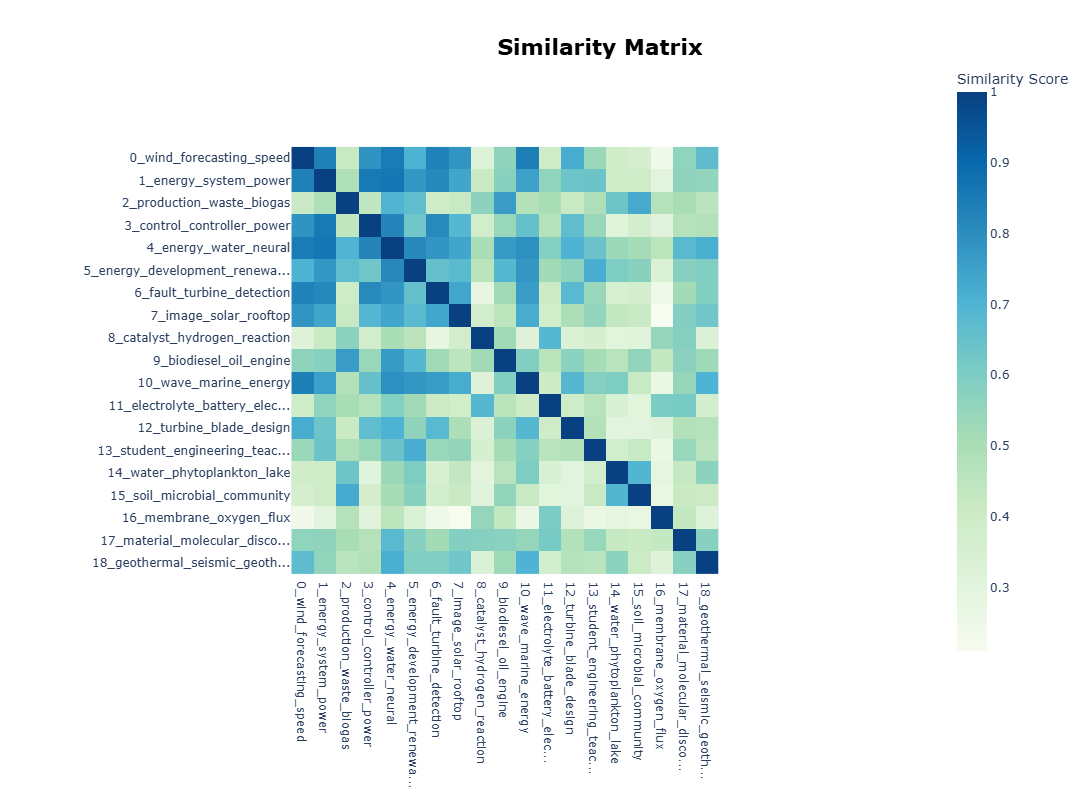

In [64]:
# 4. Visualize similarity matrix
fig_heatmap = topic_model.visualize_heatmap()
fig_heatmap.show()
fig_heatmap.write_html("topic_heatmap.html")


22it [00:04,  5.33it/s]


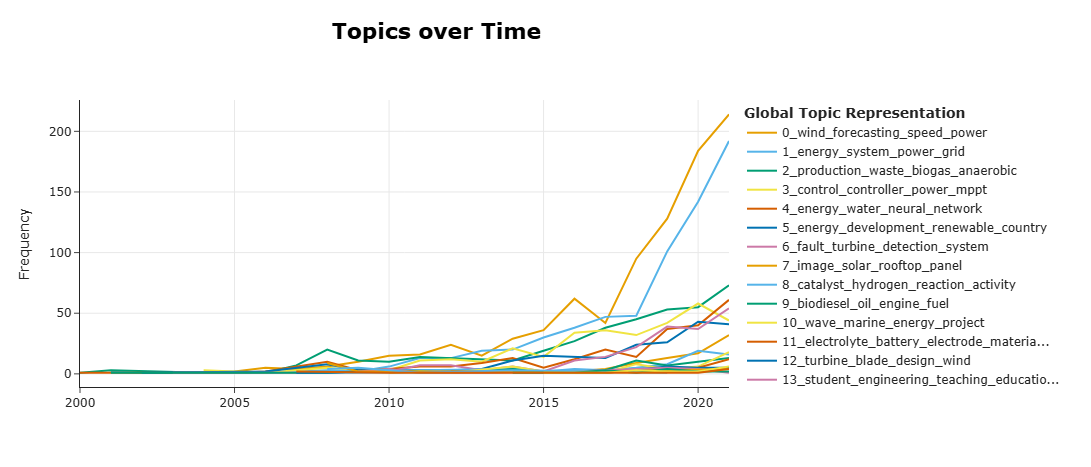

In [67]:
# 5. Visualize topic evolution over time
df['Year'] = df['Year'].fillna(0).astype(int)

topics_over_time = topic_model.topics_over_time(df['document'], df['Year'])
fig_trends = topic_model.visualize_topics_over_time(topics_over_time)
fig_trends.show();

fig_trends.write_html("topic_trends_over_time.html")